In [63]:
import numpy as np
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt

% matplotlib inline
SEED = 16012018
prng = np.random.RandomState(SEED)

Observations

Given a set of 1000 observations, a typical visualization task would be to try and plot them. Figure [] shows that the number of observations can make it difficult to discern a pattern in the data. 


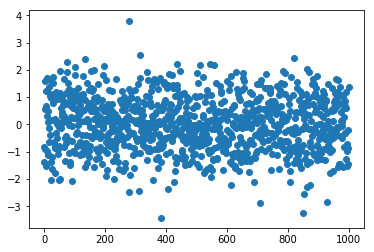

In [40]:
size=1000
x = np.arange(size)
kernal = st.norm()
data = kernal.rvs(size=size, random_state=SEED)
fig, ax = plt.subplots()
ax.scatter(x, data)
plt.show()

Distribution

Typically to get an overveiw of datasets that are too large to visualize without any processing, we instead visualize the frequency of the values in the dataset (bar chart citation) if the data is discrete and the histogram of the dataset if the values are drawn from a continous sample. The dataset from [figure] is drawn from a continous data set, and so the histogram can be seen in [figure].

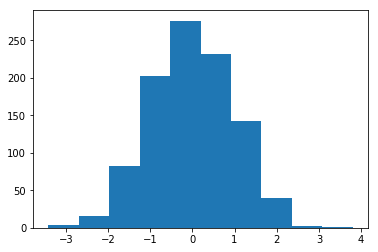

In [41]:
fig, ax = plt.subplots()
ax.hist(data)
plt.show()

Besides the frequency, we are also interested in quantifying what values are considered typical for the dataset and which are considered anomoulous. By fitting a distribution to the dataset [chambers citation], we build a simple model for what the data looks like that we can also then use to predict whether unknown obeservations are in the dataset or fit the existing pattern.

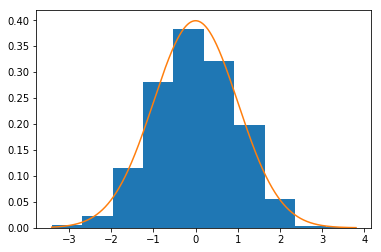

In [42]:
xd = np.linspace(data.min(), data.max(), 1000)
fig, ax = plt.subplots()
ax.hist(data, normed=True)
ax.plot(xd, kernal.pdf(xd))
plt.show()

Joint Probability & Conditional Distribution

Since most datasets are not made up of just one variable, often what we're interested in is the co-occurance of variables in the dataset. 
[insert joint probability formula]

Specifically though, we usually want to know the conditions under which we have those co-occurances. Not just the frequency of both variables, but the probabiluty of one variable given that the other has occured. 

[insert conditional probability formula here]

Toy Dataset:
A dataset of 100 marbles, made of 3 different materials. Each observation in the dataset has the radius r and the material m. In all, r is a continous variable in R and m is one of three discrete materials in M. 

In [66]:
npl, ngl, nst = 35, 30, 35
size = sum([npl, ngl, nst])
plastic = prng.randn(35) 
glass = prng.randn(30) + 5
steel  = prng.randn(35) + 2.5

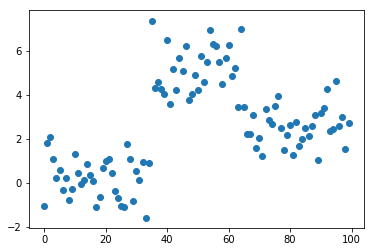

In [67]:
fig, ax = plt.subplots()
ax.scatter(np.arange(size), np.hstack([plastic, 
                                    glass, steel]))
plt.show()

The data in figure 3 appears seperable, but we'd really like to evaluate this via a visualization. Because the secondary variable is categorical, the most common visualization approach is to color the obeservations by category.

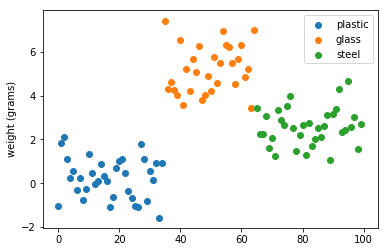

In [80]:
fig, ax = plt.subplots()

ax.scatter(np.arange(npl), plastic, label = "plastic" )
ax.scatter(np.arange(npl,npl+ng), glass, label = "glass") 
ax.scatter(np.arange(npl+ng, size), steel, label = "steel")
ax.legend()
ax.set_ylabel("radius (grams)")
plt.show()

Figure [] is a common way of showing how data is distributed by category. It can also be used as a proxy for showing the conditional probability because it is showing individual observations. Since color is most easily discernable [insert citation graphical representation], a user is most likely to first filter on color and so fix the given event as one of the materials. Once fixed, the point cloud of any color is the distribution of radii of that event. The converse is also true - the user of this graph can mentally fix a radius and then look at how the colors distribute along that line as in figure[]

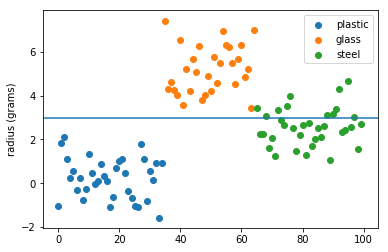

In [84]:
fig, ax = plt.subplots()

ax.scatter(np.arange(npl), plastic, label = "plastic" )
ax.scatter(np.arange(npl,npl+ng), glass, label = "glass") 
ax.scatter(np.arange(npl+ng, size), steel, label = "steel")
ax.legend()
ax.axhline(y=3)
ax.set_ylabel("radius (grams)")
plt.show()

Conditional Probaility 



Conditional Dependency